In [2]:
wav_path = "/Volumes/AnxietyBU/callbacks/or60rd49/d1-baseline/or60rd49-d1-20240425114931-Block0.wav"

import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib widget

%load_ext autoreload
%autoreload 1

fs, audio = wavfile.read(wav_path)

cam_audio = audio[:,1]
cam_audio.shape

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(1495040,)

In [3]:
%aimport utils.video
from utils.video import get_video_frames_from_callback_audio

vid_frames = get_video_frames_from_callback_audio(cam_audio)
vid_frames
print(f'Found {len(vid_frames)} video frames.')

Found 3718 video frames.


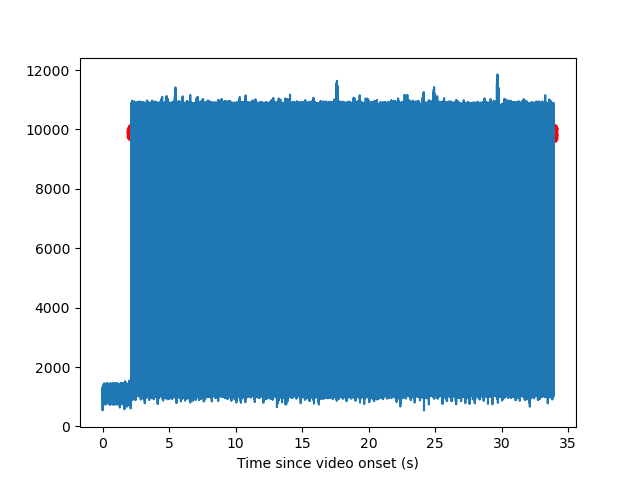

In [4]:
import time

xmin_start = 0  # where to start animation
xrange = 0.2  # length of x-axis
dx = 0.025
x_stop = 35

fig = plt.figure()
ax = fig.subplots()

x_time = np.arange(len(cam_audio)) / 44100
ax.plot(x_time, cam_audio)
ax.scatter(vid_frames / 44100, cam_audio[vid_frames], color="red")
ax.set_xlabel("Time since video onset (s)")


def update_xlim(frame):
    global xmin
    global xrange
    global dx
    global ax

    if frame == 0:
        xmin = xmin_start
    else:
        xmin += dx

    if frame % 10 == 0:
        ax.set_title(f"Frame {frame}")

    ax.set_xlim([xmin, xmin + xrange])

    return ax


n_frames = round((x_stop - xmin_start) / dx)
# n_frames = 100

sim = animation.FuncAnimation(
    fig, update_xlim, frames=n_frames, interval=75, repeat=True
)

plt.show()